In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [6]:
file= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')

In [7]:
file.head(3)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608


In [8]:
df= pd.DataFrame(file)

In [10]:
df.shape

(571, 43)

In [11]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [12]:
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

CGPA is in float therefore Linear Regression

## EDA Process

#### Null Values

In [14]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [16]:
df.dropna(subset=[
'CY-105',
'HS-105/12',
'MT-111',
'CS-105',
'CS-106',
'EL-102',
'EE-119',
'ME-107',
'CS-107',
'HS-205/20',
'MT-222',
'EE-222',
'MT-224',
'CS-210',
'CS-211',
'CS-203',
'CS-214',
'EE-217',
'CS-212',
'CS-215',
'MT-331',
'EF-303',
'HS-304',
'CS-301',
'CS-302',
'TC-383',
'MT-442',
'EL-332',
'CS-318',
'CS-306',
'CS-312',
'CS-317',
'CS-403',
'CS-421'], inplace=True)

In [18]:
most_frequent = df['CS-406'].value_counts().idxmax()
df['CS-406'].fillna(most_frequent, inplace=True)

In [24]:
most_frequent = df['CS-412'].value_counts().idxmax()
df['CS-412'].fillna(most_frequent, inplace=True)

<AxesSubplot:>

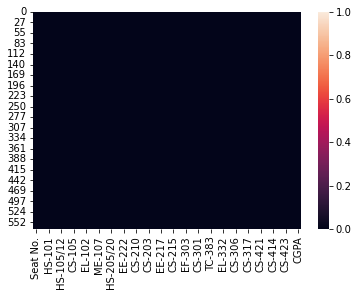

In [26]:
sns.heatmap(df.isnull())

In [28]:
df.shape

(558, 43)

#### Data Visualization

In [30]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

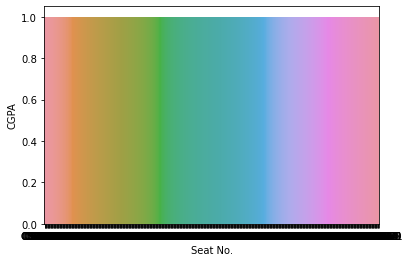

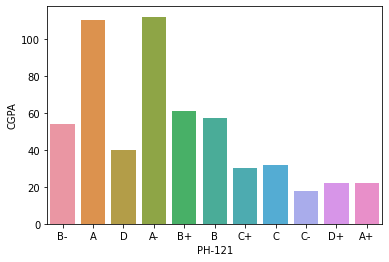

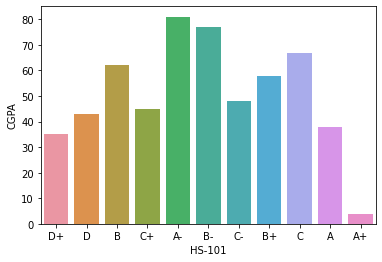

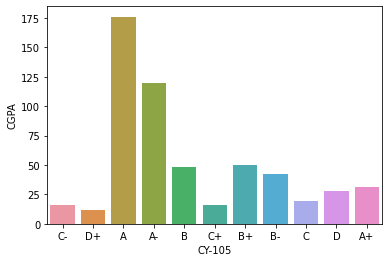

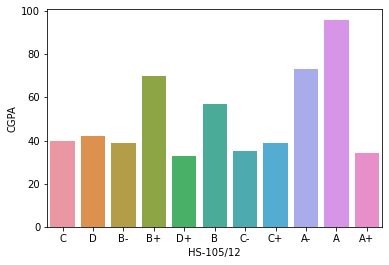

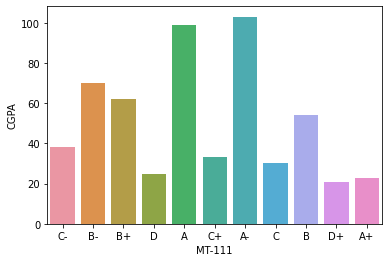

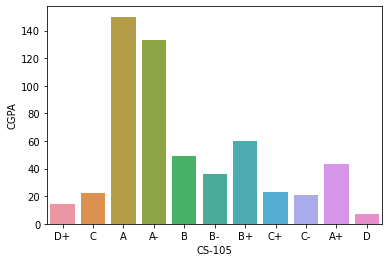

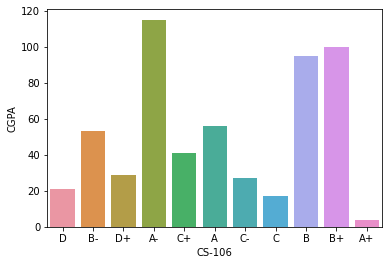

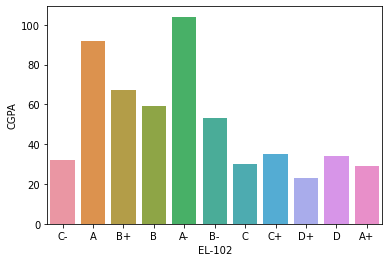

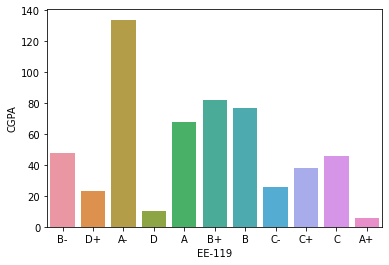

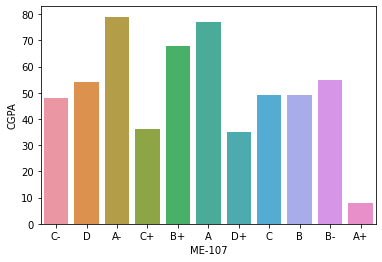

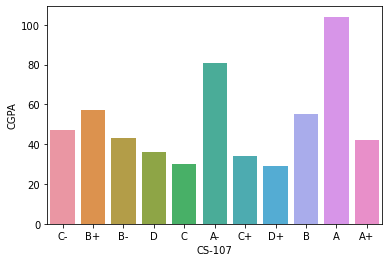

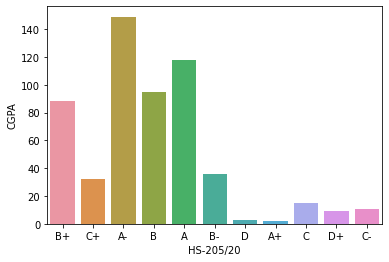

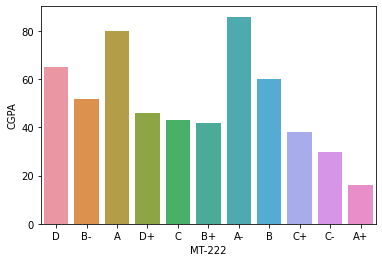

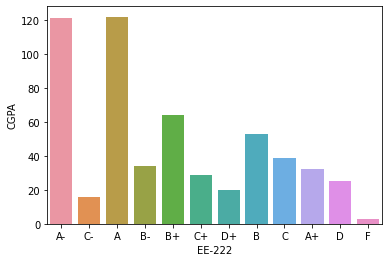

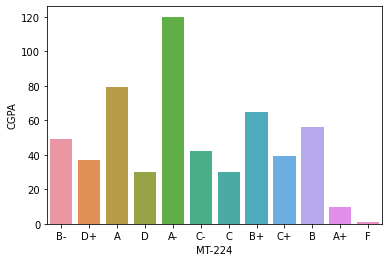

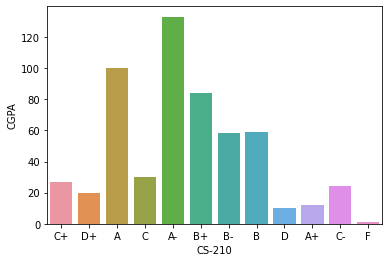

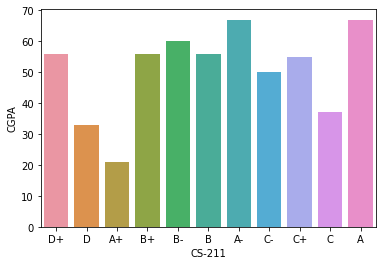

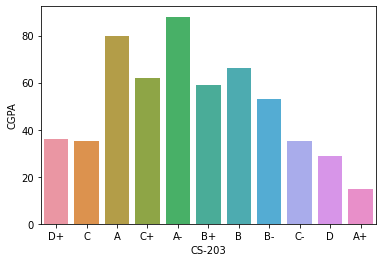

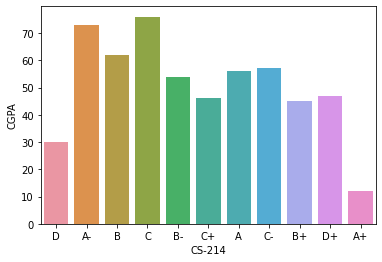

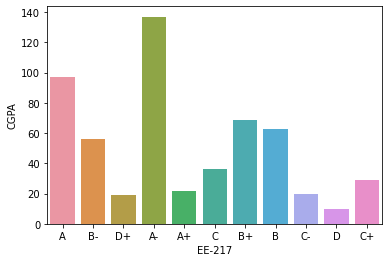

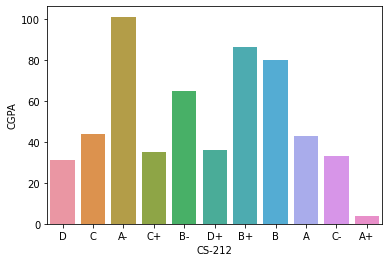

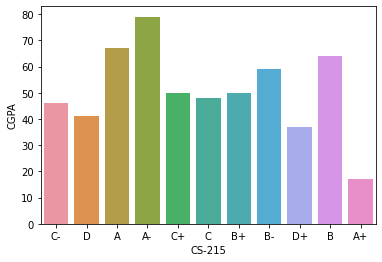

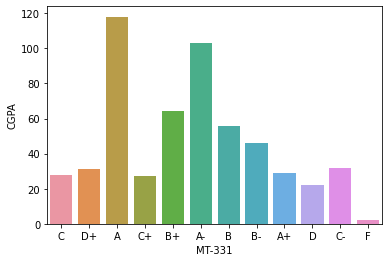

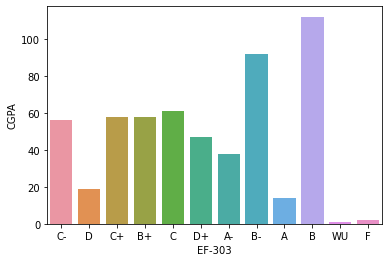

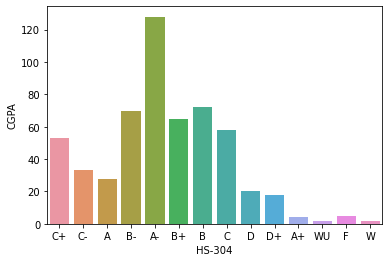

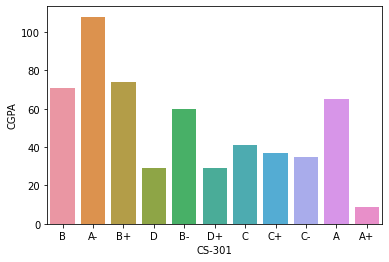

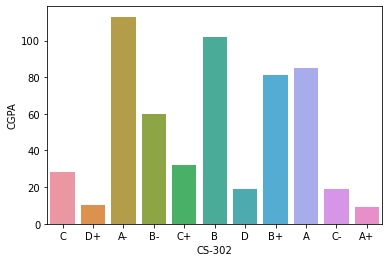

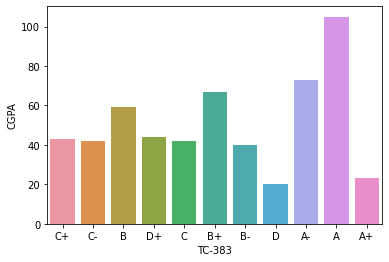

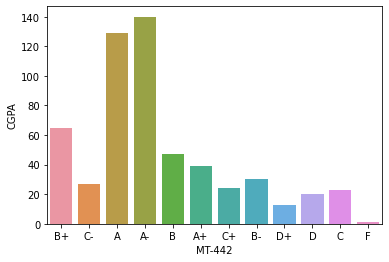

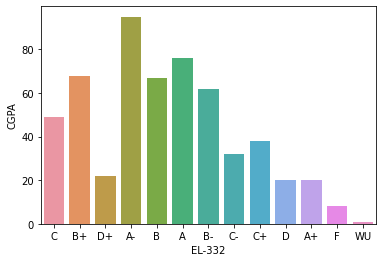

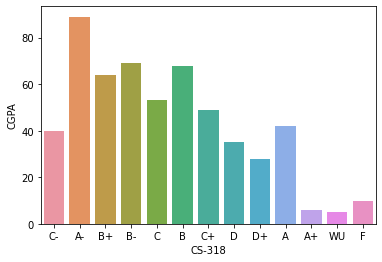

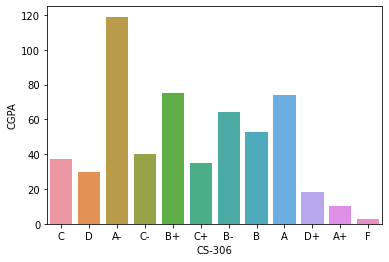

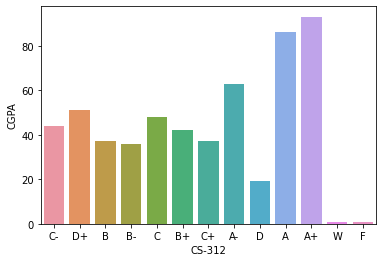

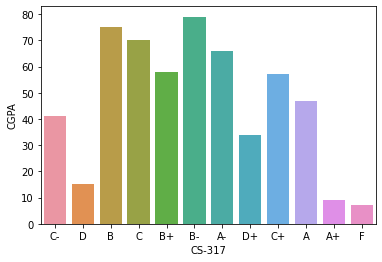

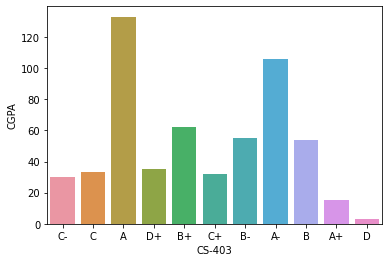

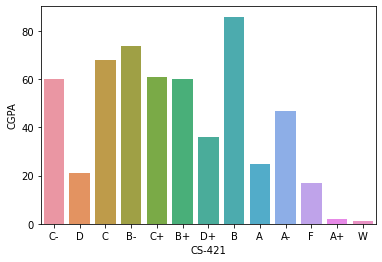

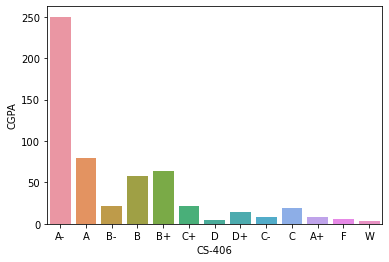

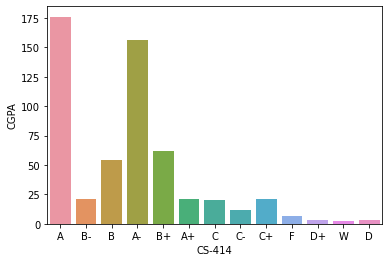

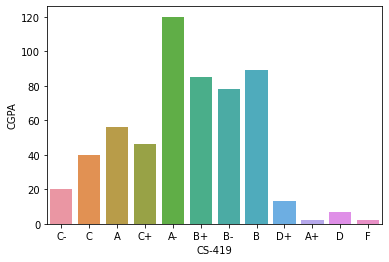

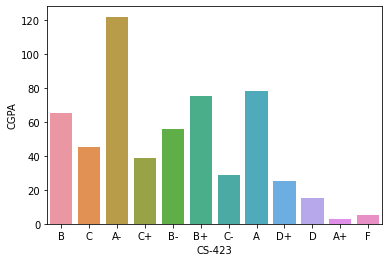

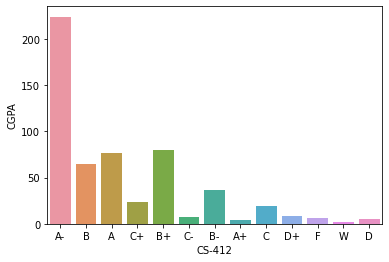

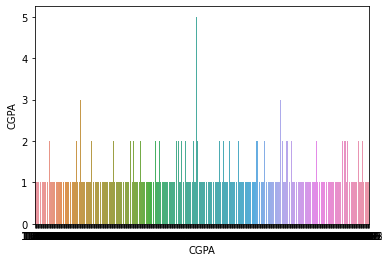

In [31]:
for column in df.columns:
    sns.countplot(x=column, data=df)
    plt.xlabel(column)
    plt.ylabel('CGPA')
    plt.show()

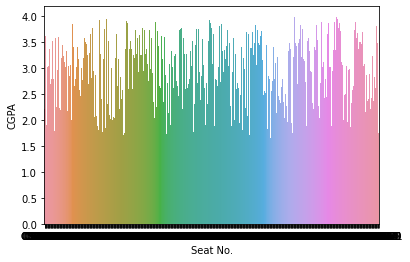

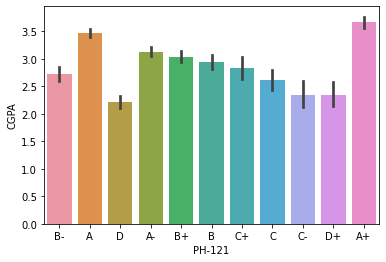

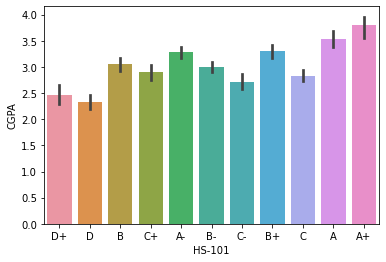

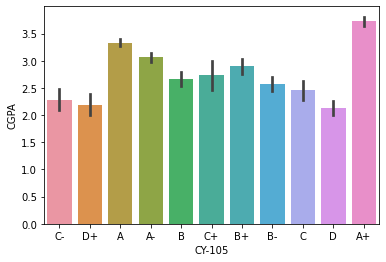

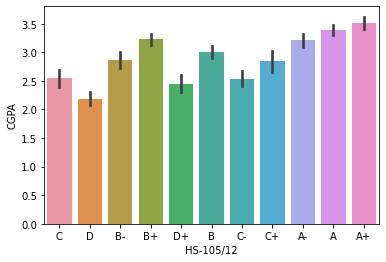

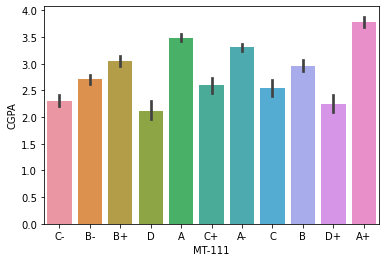

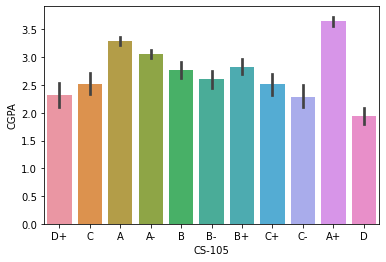

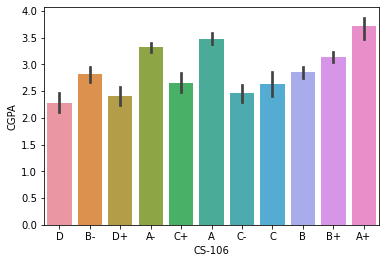

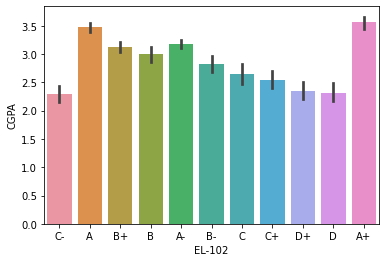

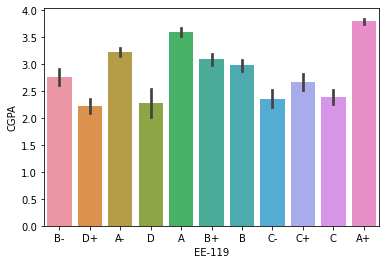

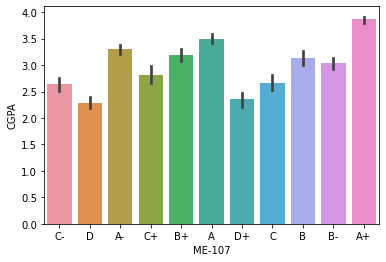

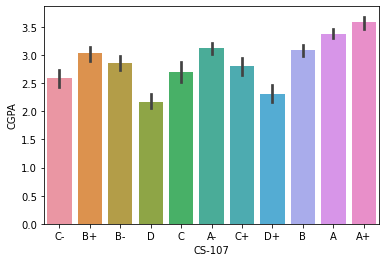

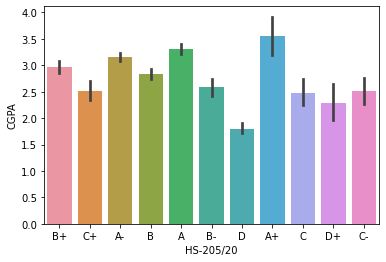

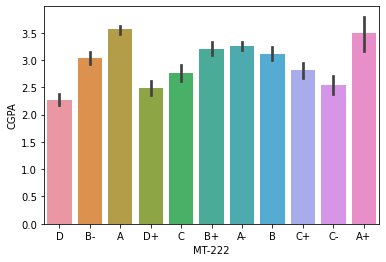

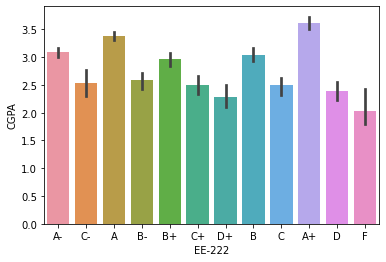

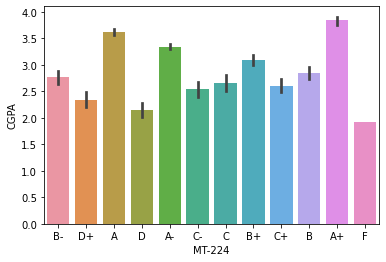

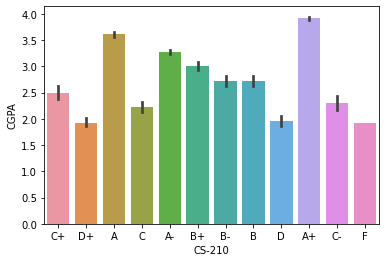

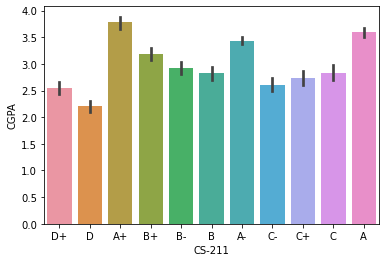

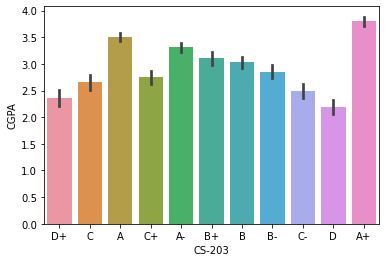

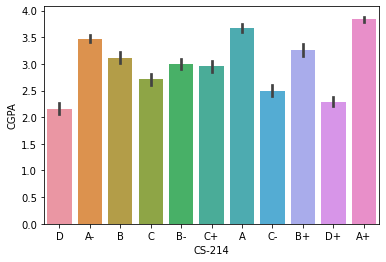

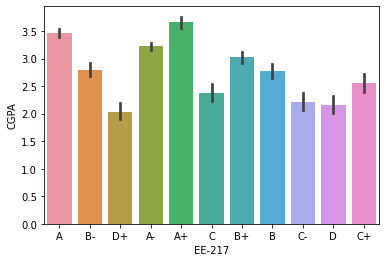

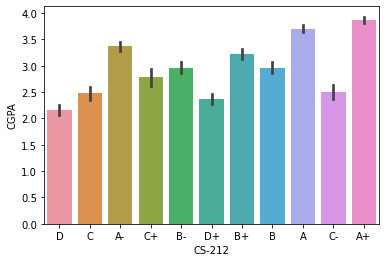

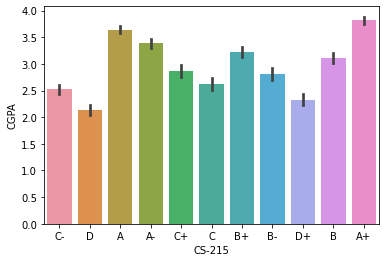

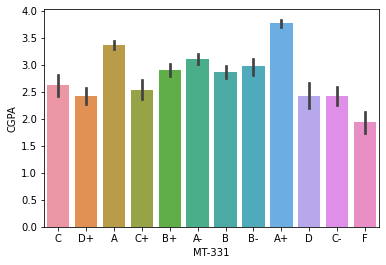

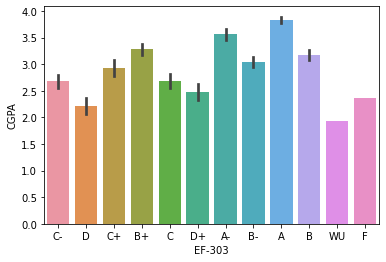

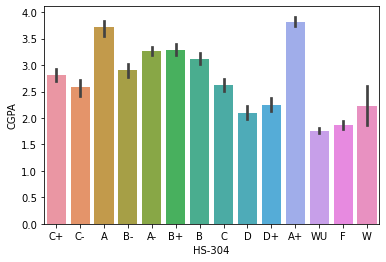

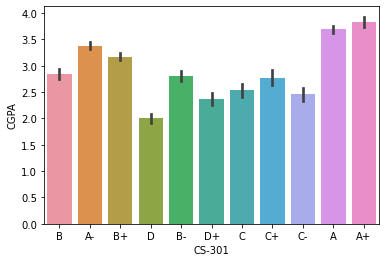

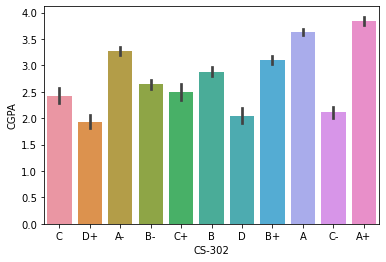

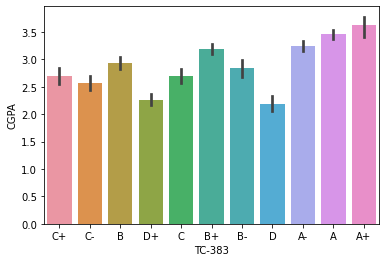

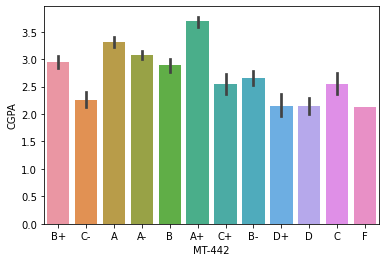

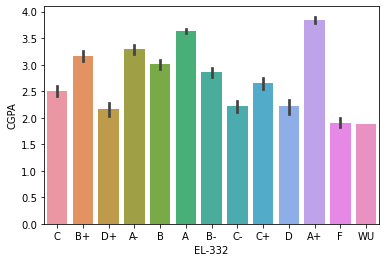

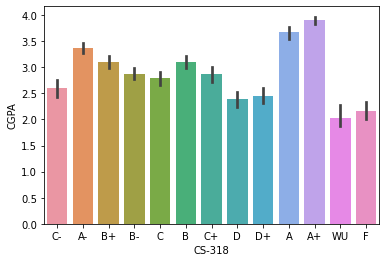

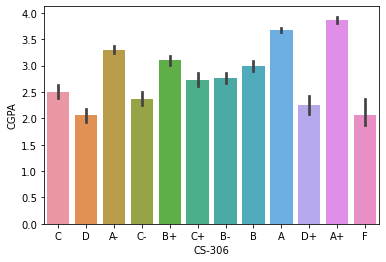

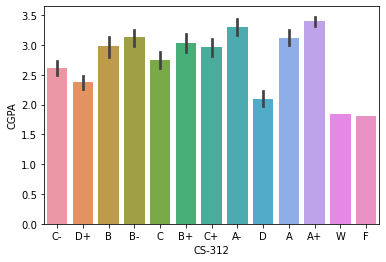

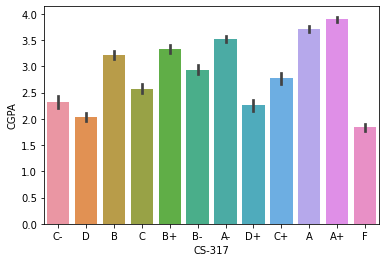

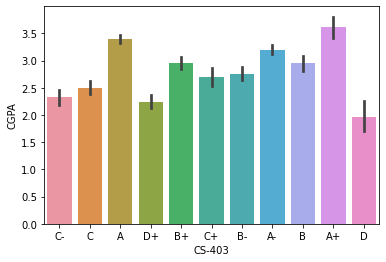

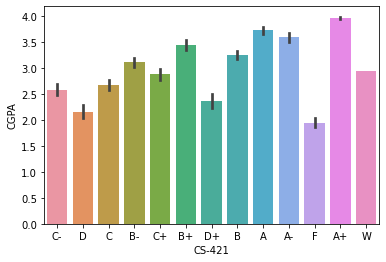

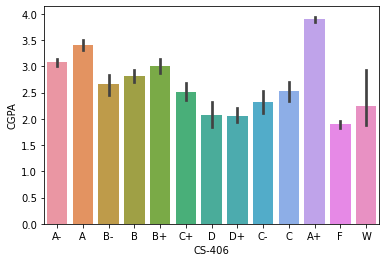

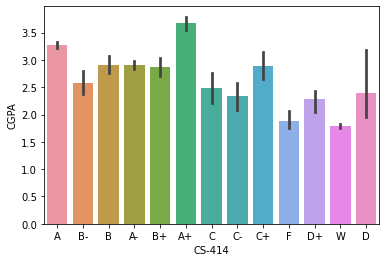

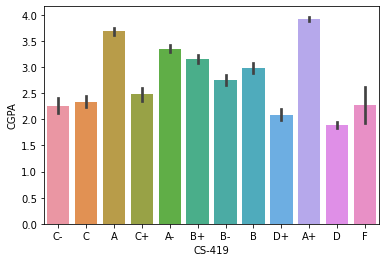

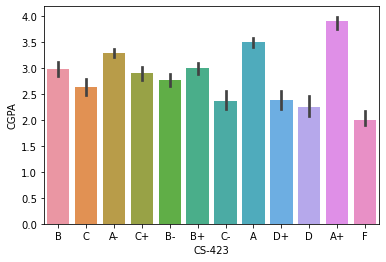

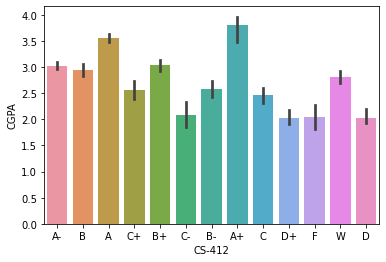

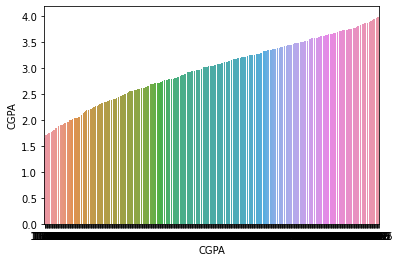

In [32]:
for column in df.columns:
    sns.barplot(x=column, y='CGPA', data=df)
    plt.xlabel(column)
    plt.show()

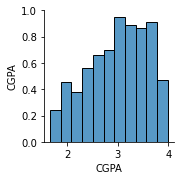

In [48]:
sns.pairplot(df)

#### Label Encoding

In [49]:
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
LE= LabelEncoder()

In [52]:
for col in df.select_dtypes(include='object'):
    print("Value counts before label encoding for column : ",col)
    print(df[col].value_counts())
    # Perform label encoding
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

    # Print the value counts after label encoding
    print("Value counts after label encoding for column : ",col)
    print(df[col].value_counts())

Value counts before label encoding for column :  Seat No.
CS-97001    1
CS-97385    1
CS-97379    1
CS-97380    1
CS-97381    1
           ..
CS-97188    1
CS-97187    1
CS-97186    1
CS-97185    1
CS-97571    1
Name: Seat No., Length: 558, dtype: int64
Value counts after label encoding for column :  Seat No.
0      1
374    1
368    1
369    1
370    1
      ..
180    1
179    1
178    1
177    1
557    1
Name: Seat No., Length: 558, dtype: int64
Value counts before label encoding for column :  PH-121
A-    112
A     110
B+     61
B      57
B-     54
D      40
C      32
C+     30
D+     22
A+     22
C-     18
Name: PH-121, dtype: int64
Value counts after label encoding for column :  PH-121
2     112
0     110
4      61
3      57
5      54
9      40
6      32
7      30
10     22
1      22
8      18
Name: PH-121, dtype: int64
Value counts before label encoding for column :  HS-101
A-    81
B-    77
C     67
B     62
B+    58
C-    48
C+    45
D     43
A     38
D+    35
A+     4
Name: HS

In [53]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0,5,10,8,6,8,10,9,8,5,...,8,8,8,8,2,0,8,3,2,2.205
1,1,0,9,10,9,5,6,9,0,10,...,10,9,6,9,2,5,6,6,3,2.008
2,2,0,3,0,5,4,0,5,4,2,...,3,3,0,6,0,0,0,2,0,3.608
3,3,9,7,10,9,9,2,10,8,9,...,10,6,10,8,5,3,7,7,7,1.906
4,4,2,2,2,4,0,0,2,4,0,...,5,4,4,5,2,0,2,2,0,3.448


#### Summary Stats

In [54]:
df.describe()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,...,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000
mean,278.500000,3.686380,5.030466,2.779570,4.170251,3.833333,2.759857,4.064516,3.878136,3.840502,...,4.087814,4.824373,3.496416,5.424731,2.987455,2.453405,3.899642,4.030466,3.055556,2.981387
std,161.224998,2.978112,2.775399,2.823945,3.148858,2.910237,2.631060,2.671640,2.959242,2.614970,...,3.332743,2.766428,2.962813,2.723770,2.456411,2.501091,2.393281,2.830484,2.323588,0.588907
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.658000
25%,139.250000,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,1.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.567000
50%,278.500000,3.000000,5.000000,2.000000,4.000000,3.500000,2.000000,4.000000,3.000000,3.000000,...,3.500000,5.000000,3.000000,5.000000,2.000000,2.000000,4.000000,4.000000,2.000000,3.042500
75%,417.750000,6.000000,7.000000,4.000000,7.000000,6.000000,4.000000,5.000000,6.000000,6.000000,...,7.000000,7.000000,5.000000,7.000000,4.000000,4.000000,5.000000,6.000000,4.000000,3.456500
max,557.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,12.000000,11.000000,10.000000,12.000000,12.000000,12.000000,11.000000,12.000000,12.000000,3.985000


#### Skewness

In [56]:
df.skew()

Seat No.     0.000000
PH-121       0.552691
HS-101       0.059910
CY-105       0.952929
HS-105/12    0.317600
MT-111       0.425468
CS-105       0.950838
CS-106       0.608150
EL-102       0.467666
EE-119       0.552765
ME-107       0.088519
CS-107       0.388102
HS-205/20    0.778503
MT-222       0.161435
EE-222       0.723630
MT-224       0.388304
CS-210       0.650658
CS-211       0.072360
CS-203       0.245791
CS-214       0.005800
EE-217       0.670776
CS-212       0.401199
CS-215       0.119607
MT-331       0.602828
EF-303       0.354290
HS-304       0.512037
CS-301       0.383531
CS-302       0.574124
TC-383       0.313905
MT-442       0.856149
EL-332       0.431886
CS-318       0.282071
CS-306       0.387039
CS-312       0.403742
CS-317       0.145783
CS-403       0.601125
CS-421       0.129899
CS-406       1.456505
CS-414       1.273896
CS-419       0.468331
CS-423       0.500975
CS-412       1.266431
CGPA        -0.333290
dtype: float64

<AxesSubplot:xlabel='CS-412', ylabel='Density'>

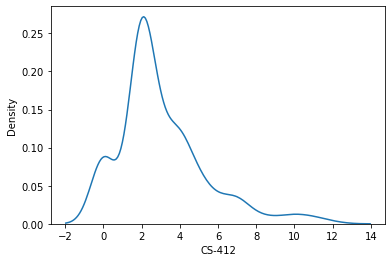

In [58]:
sns.kdeplot(df['CS-412'])

<AxesSubplot:xlabel='ME-107', ylabel='Density'>

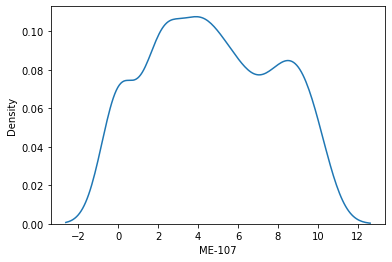

In [59]:
sns.kdeplot(df['ME-107'])

### Corr Test

In [69]:
df.corr()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
Seat No.,1.000000,0.089162,-0.037240,-0.265376,-0.264658,-0.186326,0.015143,-0.305377,-0.010164,0.053705,...,-0.484842,-0.064102,-0.441232,-0.238096,0.369183,0.492176,-0.132476,-0.010479,0.364723,0.043232
PH-121,0.089162,1.000000,0.362160,0.538048,0.489302,0.453407,0.586555,0.275352,0.406549,0.578202,...,0.067356,0.474674,0.373748,0.340473,0.317766,0.190740,0.507668,0.134249,0.333055,-0.640063
HS-101,-0.037240,0.362160,1.000000,0.317659,0.470459,0.426065,0.379629,0.303603,0.342334,0.301724,...,0.229132,0.365940,0.250985,0.328399,0.286044,0.246556,0.302913,0.251045,0.245559,-0.528176
CY-105,-0.265376,0.538048,0.317659,1.000000,0.477683,0.515443,0.563602,0.347650,0.420652,0.478068,...,0.303461,0.493264,0.538173,0.420193,0.165500,0.050779,0.493469,0.169973,0.097085,-0.640334
HS-105/12,-0.264658,0.489302,0.470459,0.477683,1.000000,0.478779,0.476268,0.490174,0.344410,0.409720,...,0.292482,0.491271,0.491452,0.457930,0.190605,0.170727,0.499936,0.267323,0.175867,-0.615848
MT-111,-0.186326,0.453407,0.426065,0.515443,0.478779,1.000000,0.374135,0.487908,0.540067,0.398494,...,0.512212,0.570127,0.463313,0.561805,0.331211,0.261494,0.543024,0.440440,0.299523,-0.744385
CS-105,0.015143,0.586555,0.379629,0.563602,0.476268,0.374135,1.000000,0.270898,0.340961,0.494652,...,0.082260,0.394767,0.325776,0.281564,0.271209,0.157354,0.344291,0.075959,0.211277,-0.579252
CS-106,-0.305377,0.275352,0.303603,0.347650,0.490174,0.487908,0.270898,1.000000,0.311874,0.282355,...,0.488931,0.424930,0.476104,0.435381,0.145115,0.135060,0.456166,0.366069,0.205047,-0.542886
EL-102,-0.010164,0.406549,0.342334,0.420652,0.344410,0.540067,0.340961,0.311874,1.000000,0.452446,...,0.335855,0.478313,0.353378,0.412039,0.277643,0.280854,0.417805,0.414978,0.291589,-0.655236
EE-119,0.053705,0.578202,0.301724,0.478068,0.409720,0.398494,0.494652,0.282355,0.452446,1.000000,...,0.173006,0.451771,0.382389,0.389638,0.317755,0.239739,0.496304,0.273779,0.342438,-0.646629


<AxesSubplot:>

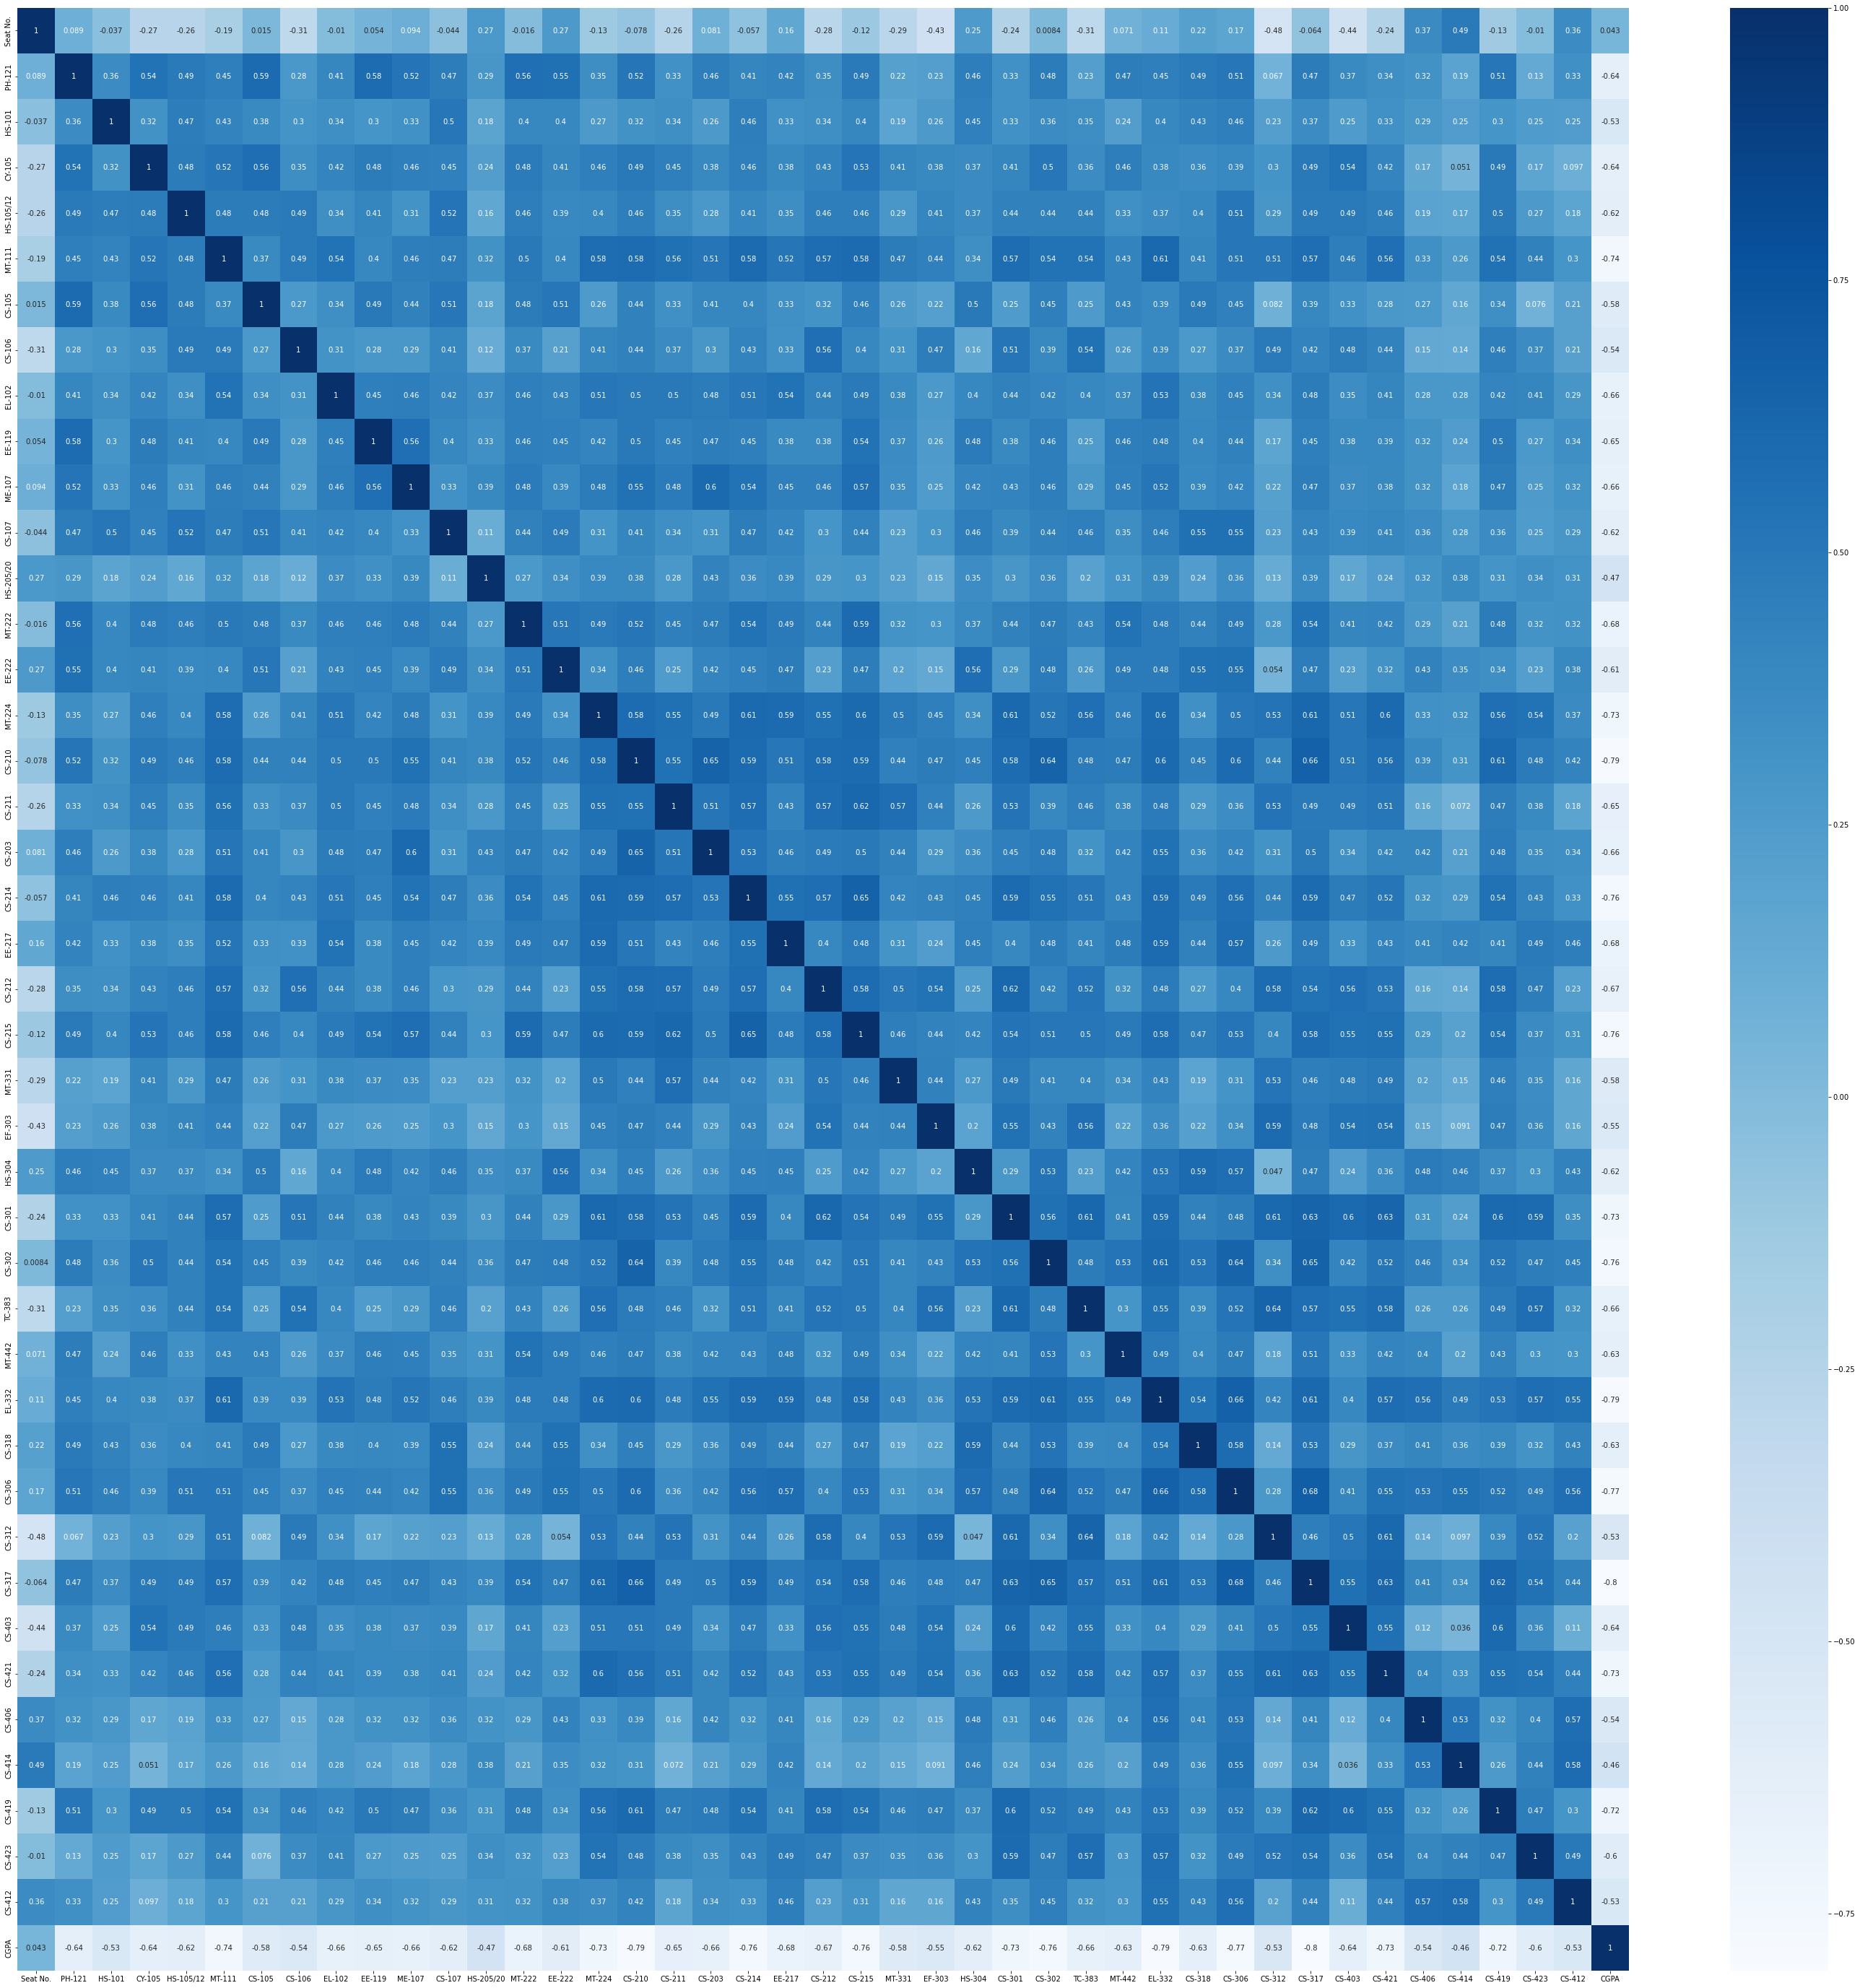

In [72]:
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

#### VIF

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
x=df.iloc[:,:-1]

In [75]:
x.shape

(558, 42)

In [76]:
x.shape[1]

42

In [77]:
y=df.iloc[:,-1]

In [78]:
y.shape

(558,)

In [79]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0,5,10,8,6,8,10,9,8,5,...,8,8,8,8,2,0,8,3,2,2.205
1,1,0,9,10,9,5,6,9,0,10,...,10,9,6,9,2,5,6,6,3,2.008
2,2,0,3,0,5,4,0,5,4,2,...,3,3,0,6,0,0,0,2,0,3.608
3,3,9,7,10,9,9,2,10,8,9,...,10,6,10,8,5,3,7,7,7,1.906
4,4,2,2,2,4,0,0,2,4,0,...,5,4,4,5,2,0,2,2,0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,553,3,0,0,2,1,0,2,2,1,...,2,2,0,0,0,4,4,3,0,3.798
567,554,1,0,0,0,0,0,0,2,0,...,4,4,0,0,2,3,2,6,2,3.772
568,555,3,0,2,4,0,0,0,0,0,...,2,3,0,4,0,6,4,2,2,3.470
569,556,0,4,9,0,9,10,5,8,5,...,9,3,3,8,9,6,3,5,6,2.193


In [80]:
def vif_cal():
    vif=pd.DataFrame()
    vif['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['columns']=x.columns
    print(vif)

In [81]:
vif_cal()

          vif    columns
0    7.290995   Seat No.
1    7.077995     PH-121
2    7.432865     HS-101
3    4.939488     CY-105
4    6.492911  HS-105/12
5    7.268812     MT-111
6    4.924181     CS-105
7    6.358054     CS-106
8    5.373667     EL-102
9    6.946940     EE-119
10   7.746794     ME-107
11   6.119202     CS-107
12   4.439363  HS-205/20
13   6.919933     MT-222
14   5.378923     EE-222
15   8.376791     MT-224
16   8.509353     CS-210
17   8.822071     CS-211
18   8.046313     CS-203
19  10.515954     CS-214
20   6.528037     EE-217
21  10.483978     CS-212
22   9.898313     CS-215
23   4.953074     MT-331
24   8.320738     EF-303
25   9.959030     HS-304
26  10.217615     CS-301
27   8.191854     CS-302
28   8.136791     TC-383
29   4.559537     MT-442
30   9.976956     EL-332
31   9.487091     CS-318
32  10.948955     CS-306
33   8.498265     CS-312
34  13.138399     CS-317
35   6.508282     CS-403
36  13.347985     CS-421
37   5.576878     CS-406
38   4.947072     CS-414


### Data Cleansing & Feature Engineering

#### Making Normal Distribution

In [82]:
x= df.iloc[:,:-1]

In [83]:
y=df.iloc[:,-1]

In [84]:
#preprocessing = labelencoder & standard scalar

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
ss = StandardScaler()

In [87]:
x=ss.fit_transform(x)

In [88]:
x

array([[-1.72894955,  0.44148737,  1.79217215, ...,  1.71481676,
        -0.36438669, -0.45468583],
       [-1.72274147, -1.23893522,  1.43154032, ...,  0.8783939 ,
         0.69645386, -0.02393083],
       [-1.7165334 , -1.23893522, -0.73225065, ..., -1.63087468,
        -0.7180002 , -1.31619583],
       ...,
       [ 1.7165334 , -0.23068167, -1.81414613, ...,  0.04197104,
        -0.7180002 , -0.45468583],
       [ 1.72274147, -1.23893522, -0.37161882, ..., -0.37624039,
         0.34284034,  1.26833417],
       [ 1.72894955,  0.77757188,  1.43154032, ...,  0.04197104,
         1.75729441,  2.12984417]])

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [91]:
x_test.shape

(168, 42)

In [92]:
y_test.shape

(168,)

##### Linear Reg

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
lr=LinearRegression()

In [95]:
lr.fit(x_train,y_train)

LinearRegression()

In [96]:
lr.score(x_train,y_train)

0.9919174333033896

In [97]:
lr.intercept_

2.982185445046499

In [98]:
# coef means if x increase by 1 then how many y will increase
lr.coef_

array([-0.00557281, -0.02440077, -0.0178395 , -0.0290557 , -0.02065729,
       -0.01778557, -0.02814187, -0.00853478, -0.0264169 , -0.01995372,
       -0.03072771, -0.02458743, -0.01336358, -0.01583212, -0.0181497 ,
       -0.01267421, -0.0334234 , -0.01716832, -0.0161066 , -0.02114707,
       -0.02820575, -0.01248254, -0.01831481, -0.03260946, -0.00606491,
       -0.02139522, -0.02619385, -0.03024971, -0.02393093, -0.01899261,
       -0.02497379, -0.00658211, -0.02905115, -0.01901023, -0.02561688,
       -0.03307902, -0.02981109, -0.02437353, -0.03334916, -0.02220887,
       -0.01461791, -0.01342204])

In [99]:
col=df.columns

In [100]:
list(zip(lr.coef_,col))

[(-0.005572808911309449, 'Seat No.'),
 (-0.024400774666431462, 'PH-121'),
 (-0.01783949742830923, 'HS-101'),
 (-0.029055696744287787, 'CY-105'),
 (-0.02065728823062883, 'HS-105/12'),
 (-0.01778557361684077, 'MT-111'),
 (-0.02814187495230719, 'CS-105'),
 (-0.008534776744159717, 'CS-106'),
 (-0.026416899742033217, 'EL-102'),
 (-0.01995372274804204, 'EE-119'),
 (-0.030727713685773383, 'ME-107'),
 (-0.024587434058260138, 'CS-107'),
 (-0.013363578153965997, 'HS-205/20'),
 (-0.015832121860854396, 'MT-222'),
 (-0.018149699328199764, 'EE-222'),
 (-0.012674212939500945, 'MT-224'),
 (-0.03342339714438641, 'CS-210'),
 (-0.017168316150455224, 'CS-211'),
 (-0.016106599323800253, 'CS-203'),
 (-0.021147066110030782, 'CS-214'),
 (-0.028205749727270926, 'EE-217'),
 (-0.012482540871538841, 'CS-212'),
 (-0.01831481466561079, 'CS-215'),
 (-0.0326094602137073, 'MT-331'),
 (-0.0060649082949818245, 'EF-303'),
 (-0.021395224678851858, 'HS-304'),
 (-0.026193846083757754, 'CS-301'),
 (-0.030249710841765125, 'CS

In [101]:
pred= lr.predict(x_test)

In [102]:
pred

array([3.57182109, 3.90496142, 3.4303622 , 3.56308492, 3.39295554,
       2.65656459, 3.44524179, 2.73657838, 2.03784272, 2.64484411,
       3.21475396, 3.2246313 , 2.82737902, 3.15808678, 4.00361507,
       3.78170615, 1.77968653, 2.69272331, 2.70221093, 3.26714216,
       2.7196185 , 2.91640166, 2.90756898, 2.94729225, 3.43892483,
       3.74774803, 2.56539225, 3.5247673 , 2.30498102, 3.44885301,
       3.02119631, 3.62203406, 3.07592219, 2.72430159, 3.12551668,
       2.05558903, 3.53320865, 2.90356255, 2.85979584, 2.37629988,
       3.81465742, 3.68022666, 3.74640658, 2.79530857, 3.70191353,
       2.56954488, 3.01194353, 1.950013  , 3.29399963, 1.61183816,
       2.93443839, 3.29562053, 4.02117272, 3.46034233, 3.50035763,
       2.50083895, 2.76351342, 2.56210125, 3.891129  , 2.90196118,
       3.97446684, 3.17781195, 2.22025399, 1.98545794, 3.74802781,
       3.61037918, 3.04077724, 1.97250342, 3.23334321, 3.13662654,
       2.15011944, 2.20343825, 3.25401386, 3.06559662, 3.83260

In [103]:
predicted_df=pd.DataFrame(pred)

In [104]:
predicted_df.head()

,0
0,3.571821
1,3.904961
2,3.430362
3,3.563085
4,3.392956


In [105]:
lr.score(x_test,y_test)

0.985264596577042

#### Errors / Metrics

In [106]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [107]:
print('mean squared error=',mean_squared_error(y_test,pred))
print('root mean squared error=',np.sqrt(mean_squared_error(y_test,pred)))
print('mean abs error=',mean_absolute_error(y_test,pred))
print('r2 score/performence=',r2_score(y_test,pred))

mean squared error= 0.004821834001732665
root mean squared error= 0.06943942685342863
mean abs error= 0.05114036415423994
r2 score/performence= 0.985264596577042


In [125]:
def cgpa(values):
    values=np.array(values)
    values=values.reshape(1,-1)
    result=lr.predict(values)
    result=abs(result)
    print('predicted cgpa is',result)

In [126]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0,5,10,8,6,8,10,9,8,5,...,8,8,8,8,2,0,8,3,2,2.205
1,1,0,9,10,9,5,6,9,0,10,...,10,9,6,9,2,5,6,6,3,2.008
2,2,0,3,0,5,4,0,5,4,2,...,3,3,0,6,0,0,0,2,0,3.608
3,3,9,7,10,9,9,2,10,8,9,...,10,6,10,8,5,3,7,7,7,1.906
4,4,2,2,2,4,0,0,2,4,0,...,5,4,4,5,2,0,2,2,0,3.448


In [127]:
values=[df.iloc[0,:-1]]

In [128]:
cgpa(values)

predicted cgpa is [2.66576035]


#### Regularization

In [129]:
# to improve accuracy of model

In [130]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [131]:
lasso= Lasso(alpha=0.0001)

In [132]:
lasso.fit(x_train,y_train)

Lasso(alpha=0.0001)

In [133]:
lasso.score(x_train,y_train)

0.9919171869433125

In [134]:
lasso_pred=lasso.predict(x_test)

In [135]:
r2_score(y_test,lasso_pred)

0.9852737224722202

In [136]:
ridge=Ridge(alpha=0.1)

In [137]:
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [138]:
ridge.score(x_train,y_train)

0.9919174321379781

In [139]:
ridge_pred=ridge.predict(x_test)

In [140]:
r2_score(y_test,ridge_pred)

0.985266216688553

#### Using More algos

In [141]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [142]:
knn= KNeighborsRegressor()
dtc= DecisionTreeRegressor()
svr = SVR()

In [143]:
models = [knn,dtc,svr]

In [144]:
for i in models:
    i.fit(x_train,y_train)
    regressor_pred=i.predict(x_test)
    print('score of',i,i.score(x_train,y_train))
    print('mean squared error of',i,mean_squared_error(y_test,regressor_pred))
    print('root mean squared error of',i,np.sqrt(mean_squared_error(y_test,regressor_pred)))
    print('mean abs errorof',i,mean_absolute_error(y_test,regressor_pred))
    print('r2 score/performence of',i,r2_score(y_test,regressor_pred))
    print('\n')

score of KNeighborsRegressor() 0.975591854852266
mean squared error of KNeighborsRegressor() 0.011518778571428568
root mean squared error of KNeighborsRegressor() 0.10732557277475191
mean abs errorof KNeighborsRegressor() 0.08204761904761906
r2 score/performence of KNeighborsRegressor() 0.9647989024241126


score of DecisionTreeRegressor() 1.0
mean squared error of DecisionTreeRegressor() 0.04954673214285713
root mean squared error of DecisionTreeRegressor() 0.2225909525179699
mean abs errorof DecisionTreeRegressor() 0.16606547619047615
r2 score/performence of DecisionTreeRegressor() 0.848586432848603


score of SVR() 0.9870232575363806
mean squared error of SVR() 0.008833909178352575
root mean squared error of SVR() 0.0939888779502797
mean abs errorof SVR() 0.07133495413986128
r2 score/performence of SVR() 0.9730037957553037




#### Ensemble methods 

In [145]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,VotingRegressor

In [146]:
RF=RandomForestRegressor(random_state=42)
GB=GradientBoostingRegressor()
ADA=AdaBoostRegressor()

In [147]:
ens_algo=[RF,GB,ADA]

for i in ens_algo:
    i.fit(x_train,y_train)
    ens_algo_pred=i.predict(x_test)
    print('score of',i,i.score(x_train,y_train))
    print('mean squared error of',i,mean_squared_error(y_test,regressor_pred))
    print('root mean squared error of',i,np.sqrt(mean_squared_error(y_test,regressor_pred)))
    print('mean abs errorof',i,mean_absolute_error(y_test,regressor_pred))
    print('r2 score/performence of',i,r2_score(y_test,regressor_pred))
    print('\n')

score of RandomForestRegressor(random_state=42) 0.9925027083816713
mean squared error of RandomForestRegressor(random_state=42) 0.008833909178352575
root mean squared error of RandomForestRegressor(random_state=42) 0.0939888779502797
mean abs errorof RandomForestRegressor(random_state=42) 0.07133495413986128
r2 score/performence of RandomForestRegressor(random_state=42) 0.9730037957553037


score of GradientBoostingRegressor() 0.9978221981482005
mean squared error of GradientBoostingRegressor() 0.008833909178352575
root mean squared error of GradientBoostingRegressor() 0.0939888779502797
mean abs errorof GradientBoostingRegressor() 0.07133495413986128
r2 score/performence of GradientBoostingRegressor() 0.9730037957553037


score of AdaBoostRegressor() 0.9538281619904257
mean squared error of AdaBoostRegressor() 0.008833909178352575
root mean squared error of AdaBoostRegressor() 0.0939888779502797
mean abs errorof AdaBoostRegressor() 0.07133495413986128
r2 score/performence of AdaBoostR

#### Exporting Decision Tree Model

In [149]:
import joblib

In [150]:
dtc_obj= joblib.dump(ridge,'cgpa.obj')